<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0409_%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 6주차 과제4
- wine 데이터를 가지고 시각화를 해주세요!
- 문자열 데이터와 수치형 데이터를 나눠서 그래프를 그려주세요
- 모든 컬럼을 다 그래프로 그려주세요 (단, 설명할 수 있는 그래프여야 함)
- 시각화를 통한 비교 분석도 진행해주세요!
- 이진분류나 다중분류의 경우 y값에 따른 피처들의 분포가 어떻게 다른지를 꼭 정리해주셔야 합니다.
- shapiro 등을 통해 정규성을 검정하고 실제로 시각화 그래프와 실제 정규성 검정을 한 것이 어떻게 나오는지도 비교 분석 해주세요.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# wine 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

wine = pd.read_csv('/content/drive/My Drive/wine_test.csv')
wine

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
# 결측치 확인
wine.isna().sum()

Unnamed: 0                      0
alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 결측치 제거
wine = wine.dropna()
wine.isna().sum()

Unnamed: 0                      0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 인덱스 Unnamed:0 열로 지정
wine = wine.set_index('Unnamed: 0')

**1. 정규성 검정**
Shapiro-Wilk test (샤피로-윌크 검정)
- 오차항이 정규분포를 따르는지 알아보는 검정으로, 회귀분석에서 모든 독립변수에 대해서 종속변수가 정규분포를 따르는지 알아보는 방법이다.
- 귀무가설(H0): 정규분포를 따른다.
- p-value가 0.05보다 크면 귀무가설 채택, 정규성을 가정한다.
- 단, 유의할 점은 귀무가설을 채택했다는 것은 정규분포를 따르지 않는다고 말할 근거가 부족한 것일 뿐 100% 정규성이 만족된다는 뜻은 아니다. 따라서 참고하는 정도로 보는 것이 좋다.

In [ ]:
# 정규성 검정 함수 shapiro() 불러오기
from scipy.stats import shapiro

shapiro(wine['alcohol']) # p<0.05 이므로 정규성을 만족하지 못한다.

ShapiroResult(statistic=0.9789651036262512, pvalue=0.010715071111917496)

(array([ 1.,  9., 17., 27., 23., 22., 26., 25., 17.,  4.]),
 array([11.03 , 11.402, 11.774, 12.146, 12.518, 12.89 , 13.262, 13.634,
        14.006, 14.378, 14.75 ]),
 <BarContainer object of 10 artists>)

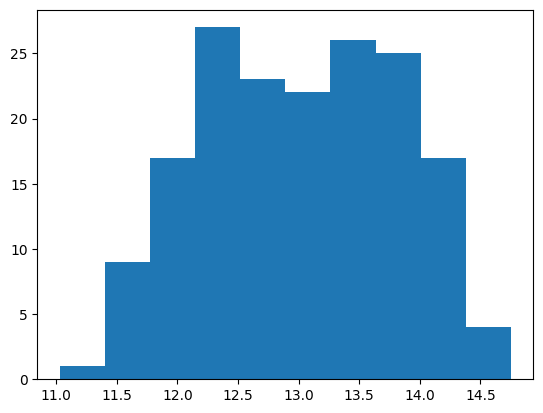

In [ ]:
# alcohol 칼럼 시각화
plt.hist(wine['alcohol']) # 시각화의 경우 종 모양을 보이나, 오른쪽으로 조금 치우쳐져 있으며 가운데가 꺼져있다.

In [ ]:
shapiro(wine['malic_acid']) # 정규성 만족

ShapiroResult(statistic=0.8933973908424377, pvalue=9.584908422510807e-10)

(array([18., 55., 32., 14., 14., 11., 14.,  7.,  3.,  3.]),
 array([0.74 , 1.246, 1.752, 2.258, 2.764, 3.27 , 3.776, 4.282, 4.788,
        5.294, 5.8  ]),
 <BarContainer object of 10 artists>)

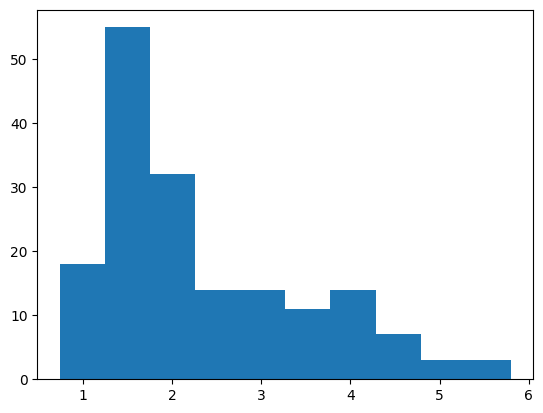

In [ ]:
# malic_acid 칼럼 시각화
plt.hist(wine['malic_acid'])  # 시각화의 경우 종 모양이 아니나, bins 개수를 조정하면 정규분포 형태를 나타낸다.

In [ ]:
shapiro(wine['ash']) # 정규성 만족하지 않음

ShapiroResult(statistic=0.9822745323181152, pvalue=0.02809259667992592)

(array([ 1.,  3.,  6., 14., 39., 52., 31., 20.,  3.,  2.]),
 array([1.36 , 1.547, 1.734, 1.921, 2.108, 2.295, 2.482, 2.669, 2.856,
        3.043, 3.23 ]),
 <BarContainer object of 10 artists>)

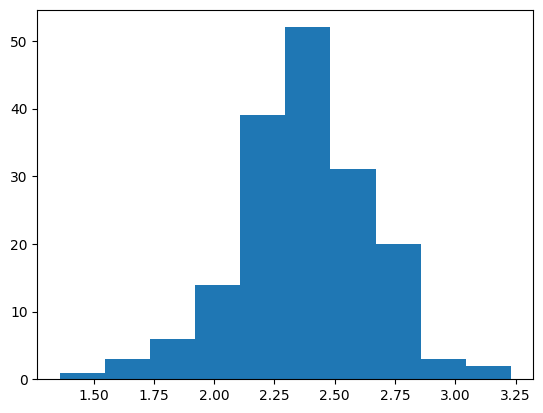

In [ ]:
# ash 칼럼 시각화
plt.hist(wine['ash']) # 기울어진 형태로, 정규분포에서 벗어남.

In [ ]:
shapiro(wine['alcalinity_of_ash']) # 정규성 만족

ShapiroResult(statistic=0.9889593124389648, pvalue=0.20355020463466644)

(array([ 4.,  2., 24., 32., 44., 32., 18., 10.,  2.,  3.]),
 array([10.6 , 12.54, 14.48, 16.42, 18.36, 20.3 , 22.24, 24.18, 26.12,
        28.06, 30.  ]),
 <BarContainer object of 10 artists>)

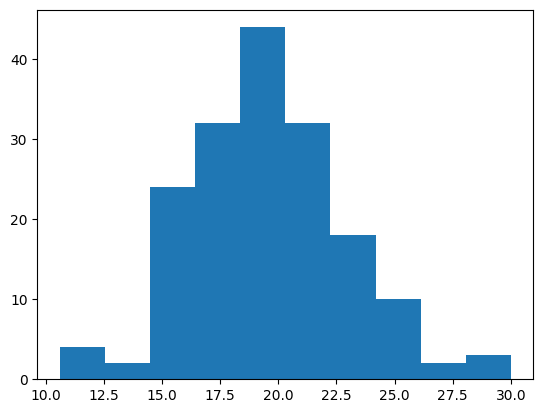

In [ ]:
# alcalinity_of_ash 칼럼 시각화
plt.hist(wine['alcalinity_of_ash']) # 종 모양의 정규분포이다.

In [ ]:
shapiro(wine['magnesium']) # 정규성 만족

ShapiroResult(statistic=0.9583852291107178, pvalue=5.724711809307337e-05)

(array([ 4., 26., 40., 41., 24., 20.,  9.,  4.,  2.,  1.]),
 array([ 70. ,  78.1,  86.2,  94.3, 102.4, 110.5, 118.6, 126.7, 134.8,
        142.9, 151. ]),
 <BarContainer object of 10 artists>)

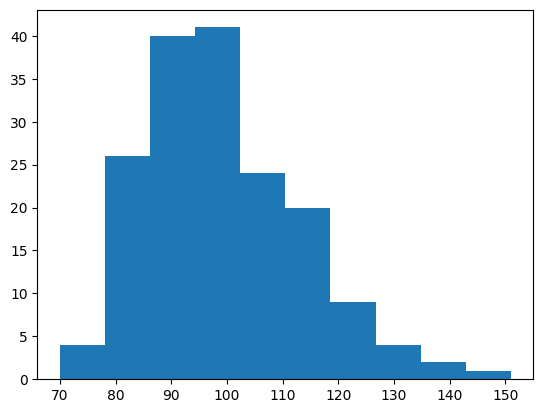

In [ ]:
# magnesium 칼럼 시각화
plt.hist(wine['magnesium']) # 왼쪽으로 치우쳐져 있으나, bins 개수 조정 시 정규분포의 형태를 보인다.

In [ ]:
shapiro(wine['total_phenols']) # 정규성 만족하지 않음

ShapiroResult(statistic=0.9741620421409607, pvalue=0.002804994350299239)

(array([ 3., 22., 26., 24., 20., 26., 31., 10.,  7.,  2.]),
 array([0.98, 1.27, 1.56, 1.85, 2.14, 2.43, 2.72, 3.01, 3.3 , 3.59, 3.88]),
 <BarContainer object of 10 artists>)

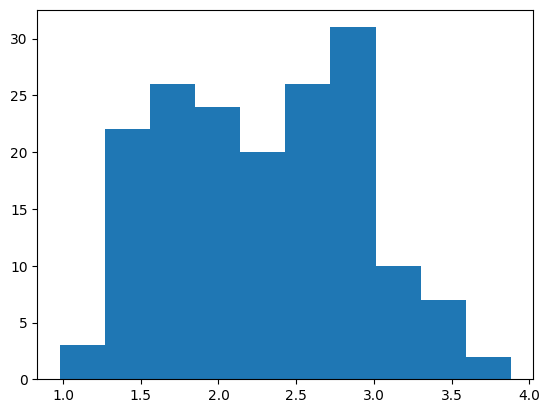

In [ ]:
# total_phenols 칼럼 시각화
plt.hist(wine['total_phenols']) # 정규분포 형태가 아님.

In [ ]:
shapiro(wine['flavanoids']) # 정규성 만족

ShapiroResult(statistic=0.9529943466186523, pvalue=1.7696378563414328e-05)

(array([33., 17., 22., 19., 31., 29., 14.,  5.,  0.,  1.]),
 array([0.34 , 0.814, 1.288, 1.762, 2.236, 2.71 , 3.184, 3.658, 4.132,
        4.606, 5.08 ]),
 <BarContainer object of 10 artists>)

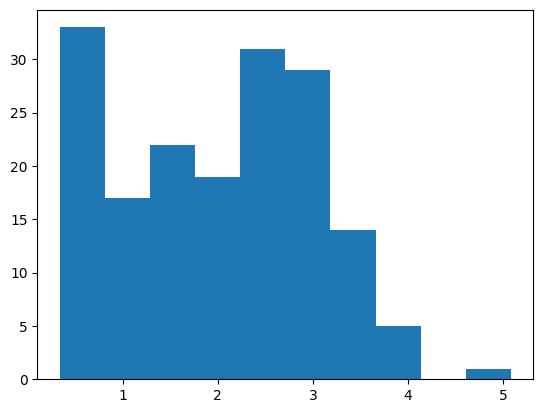

In [ ]:
# flavanoids 칼럼 시각화
plt.hist(wine['flavanoids']) # 정규분포의 형태로 보기 어려우나, bins 개수 조정 시 그나마 종 모양과 유사해진다.

In [ ]:
shapiro(wine['nonflavanoid_phenols']) # 정규성 만족하지 않음

ShapiroResult(statistic=0.9620038270950317, pvalue=0.0001311297237407416)

(array([ 8., 16., 32., 34., 12., 25., 16., 13.,  7.,  8.]),
 array([0.13 , 0.183, 0.236, 0.289, 0.342, 0.395, 0.448, 0.501, 0.554,
        0.607, 0.66 ]),
 <BarContainer object of 10 artists>)

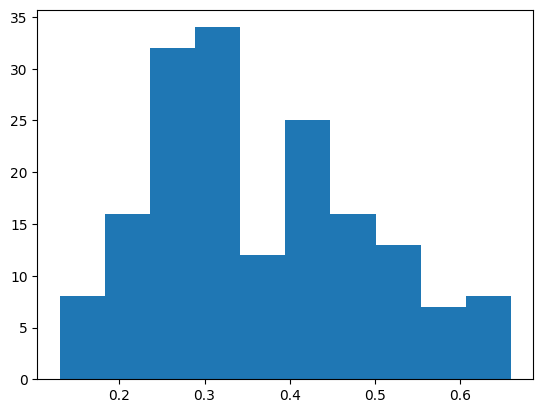

In [ ]:
#nonflavanoid_phenols 칼럼 시각화
plt.hist(wine['nonflavanoid_phenols']) # 정규분포의 형태가 아님.

In [ ]:
shapiro(wine['proanthocyanins']) # 정규성 만족

ShapiroResult(statistic=0.9842761158943176, pvalue=0.050909623503685)

(array([ 8., 25., 29., 41., 34., 17.,  8.,  7.,  1.,  1.]),
 array([0.41 , 0.727, 1.044, 1.361, 1.678, 1.995, 2.312, 2.629, 2.946,
        3.263, 3.58 ]),
 <BarContainer object of 10 artists>)

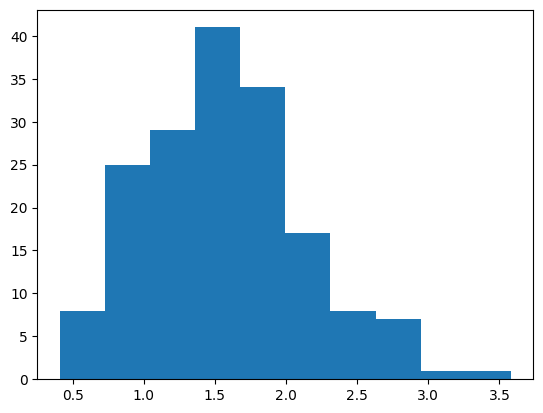

In [ ]:
# proanthocyanins 칼럼 시각화
plt.hist(wine['proanthocyanins']) # 정규분포에서 살짝 왼쪽으로 치우쳐져 있으나 정규분포의 형태라고 볼 수 있다.

In [ ]:
shapiro(wine['color_intensity']) # 정규성 만족

ShapiroResult(statistic=0.9449738264083862, pvalue=3.4743234209599905e-06)

(array([15., 38., 31., 37., 17., 13., 10.,  6.,  3.,  1.]),
 array([ 1.28 ,  2.452,  3.624,  4.796,  5.968,  7.14 ,  8.312,  9.484,
        10.656, 11.828, 13.   ]),
 <BarContainer object of 10 artists>)

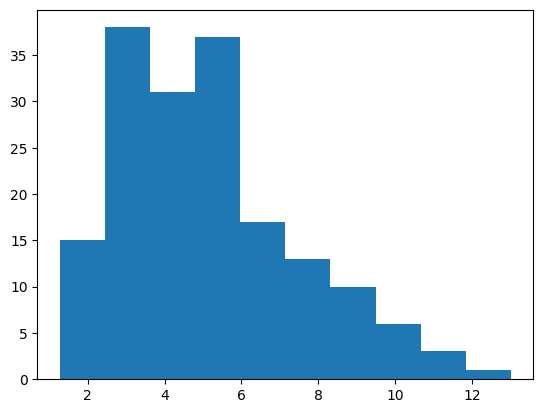

In [ ]:
# color_intensity 칼럼 시각화
plt.hist(wine['color_intensity']) # 왼쪽으로 치우쳐져 있으나, bins개수를 조정하면 그나마 종 모양과 비슷해진다.

In [ ]:
shapiro(wine['hue']) # 정규성 만족하지 않음

ShapiroResult(statistic=0.9797447919845581, pvalue=0.013410847634077072)

(array([17., 16., 18., 35., 36., 23., 20.,  5.,  0.,  1.]),
 array([0.48 , 0.603, 0.726, 0.849, 0.972, 1.095, 1.218, 1.341, 1.464,
        1.587, 1.71 ]),
 <BarContainer object of 10 artists>)

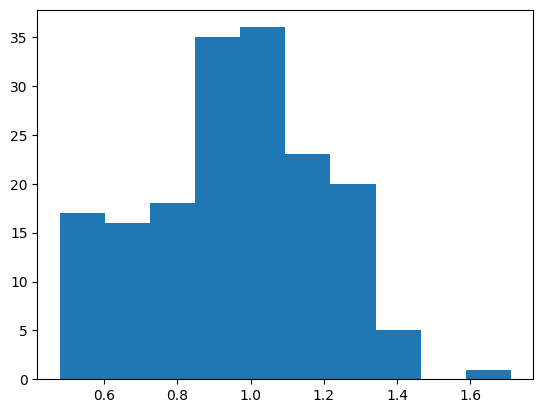

In [ ]:
# hue 칼럼 시각화
plt.hist(wine['hue']) # 정규분포의 형태가 아님.

In [ ]:
shapiro(wine['od280/od315_of_diluted_wines']) # 정규성 만족

ShapiroResult(statistic=0.9447388648986816, pvalue=3.3189360237884102e-06)

(array([13., 24., 13., 12., 10., 31., 28., 22., 15.,  3.]),
 array([1.27 , 1.543, 1.816, 2.089, 2.362, 2.635, 2.908, 3.181, 3.454,
        3.727, 4.   ]),
 <BarContainer object of 10 artists>)

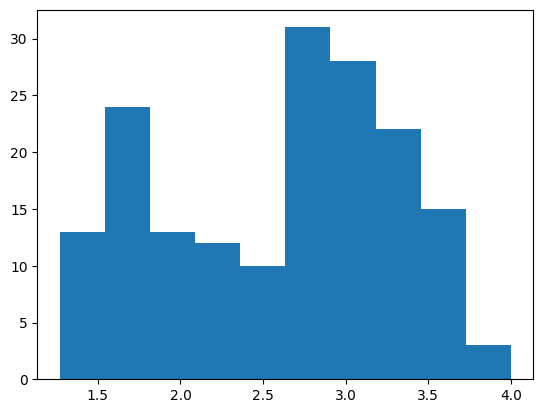

In [ ]:
# od280/od315_of_diluted_wines 칼럼 시각화
plt.hist(wine['od280/od315_of_diluted_wines']) # 정규분포의 형태로 보기 어려우나, bins 개수 조정 시 그나마 종 모양을 보인다.

In [ ]:
shapiro(wine['proline']) # 정규성 만족

ShapiroResult(statistic=0.9271714687347412, pvalue=1.4103679291110893e-07)

(array([21., 36., 40., 19., 11., 17.,  8., 13.,  4.,  2.]),
 array([ 278. ,  418.2,  558.4,  698.6,  838.8,  979. , 1119.2, 1259.4,
        1399.6, 1539.8, 1680. ]),
 <BarContainer object of 10 artists>)

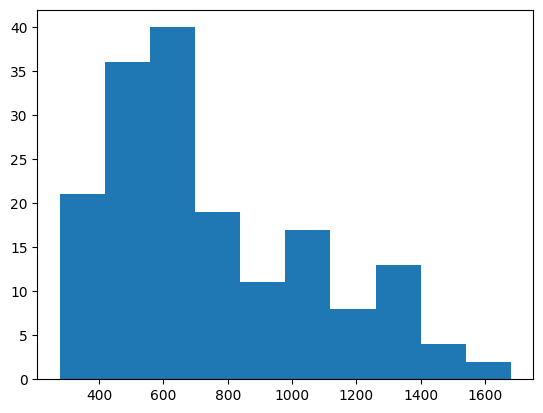

In [ ]:
# proline 칼럼 시각화
plt.hist(wine['proline']) # 왼쪽으로 치우쳐져 있으나, bins 개수 조정 시 그나마 종 모양과 유사하다.

In [ ]:
shapiro(wine['class']) # 정규성 만족

ShapiroResult(statistic=0.8027224540710449, pvalue=6.334306858332348e-14)

(array([57.,  0.,  0.,  0.,  0., 66.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

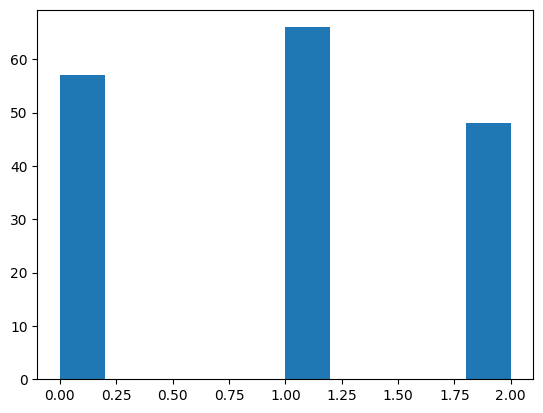

In [ ]:
# class 칼럼 시각화
plt.hist(wine['class']) # 정규분포의 형태이다.

**2. 그래프 비교 분석**

<Axes: xlabel='class', ylabel='count'>

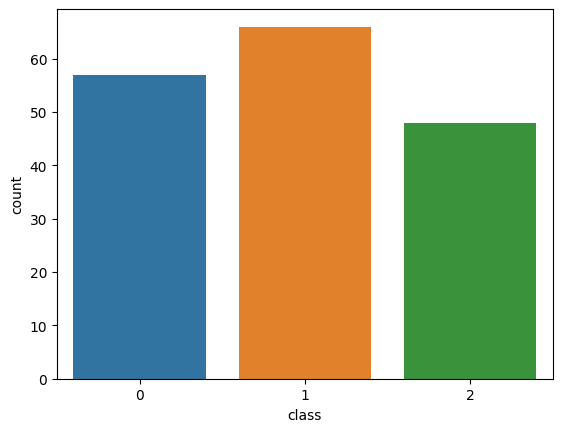

In [ ]:
# class 컬럼 시각화
sns.countplot(x = 'class', data = wine)

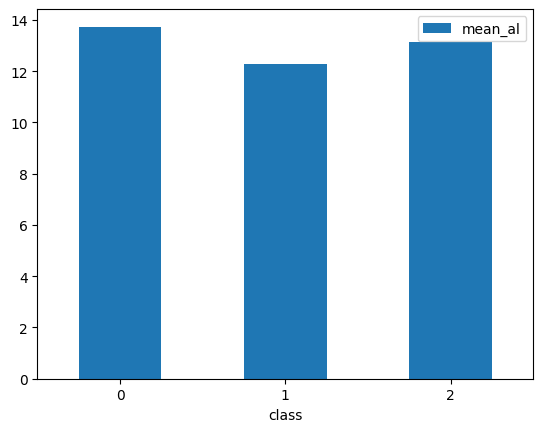

In [ ]:
# class별 평균 도수 비교
class_al = wine.groupby('class').agg(mean_al=('alcohol', 'mean'))
class_al.plot(kind='bar', y='mean_al')
plt.xticks(rotation=0)
plt.show()

-> 세 class의 평균 도수가 큰 차이가 없는 것을 보아, class의 구분 기준이 도수인 것 같지는 않다.

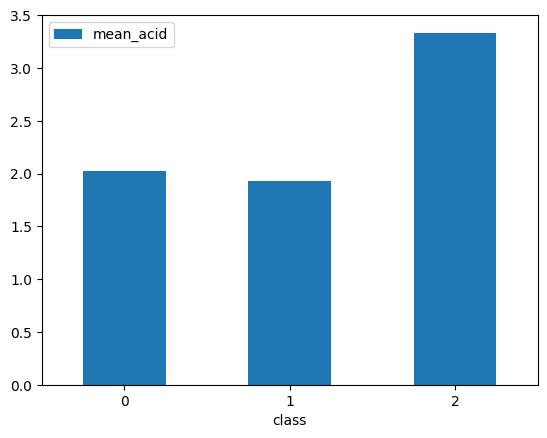

In [ ]:
# class별 평균 말산 비교
class_acid = wine.groupby('class').agg(mean_acid=('malic_acid', 'mean'))
class_acid.plot(kind='bar', y='mean_acid')
plt.xticks(rotation=0)
plt.show()

-> class2의 평균 말산이 가장 높은 것을 보아, class2에 속한 와인들은 산미가 높은 와인일 것이다.

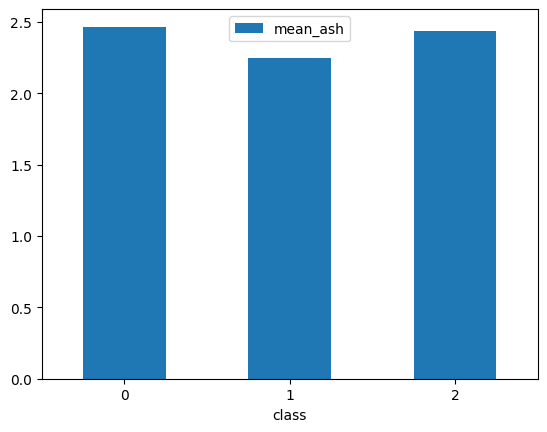

In [ ]:
# class별 평균 잔류물 비교
class_ash = wine.groupby('class').agg(mean_ash=('ash', 'mean'))
class_ash.plot(kind='bar', y='mean_ash')
plt.xticks(rotation=0)
plt.show()

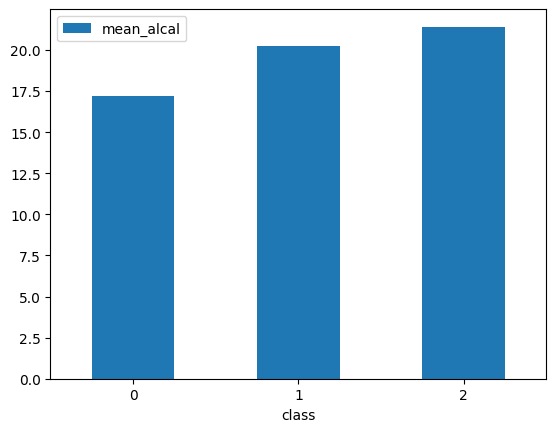

In [ ]:
# class별 평균 잔류물 알칼리도 비교
class_alcal = wine.groupby('class').agg(mean_alcal=('alcalinity_of_ash', 'mean'))
class_alcal.plot(kind='bar', y='mean_alcal')
plt.xticks(rotation=0)
plt.show()

-> 와인의 잔류물이나 잔류물의 알칼리도는 와인의 바디감과 산미에 영향을 미친다. 잔류물의 경우 세 class에 큰 차이가 없지만, 알칼리도를 보았을 때 class2가 가장 높은 수치를 나타내는 것을 보아 앞서 평균 말산을 비교했을 때 판단한 class2의 산미가 가장 높을 것이라는 예측은 더욱 확고해졌다.

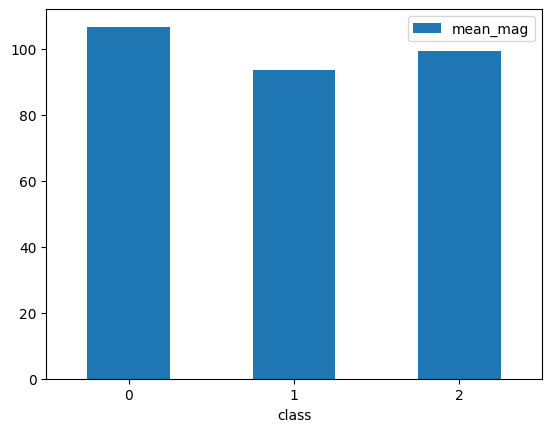

In [ ]:
# class별 평균 마그네슘 비교
class_mag = wine.groupby('class').agg(mean_mag=('magnesium', 'mean'))
class_mag.plot(kind='bar', y='mean_mag')
plt.xticks(rotation=0)
plt.show()

-> 마그네슘의 경우 와인의 풍미와 향, 즉 바디감에 영향을 미친다. 그래프를 보았을 때 class0이 가장 높은 마그네슘 함량을 가졌기 때문에, class0은 상대적으로 바디감이 높은 와인들로 구성되었다고 볼 수 있다.

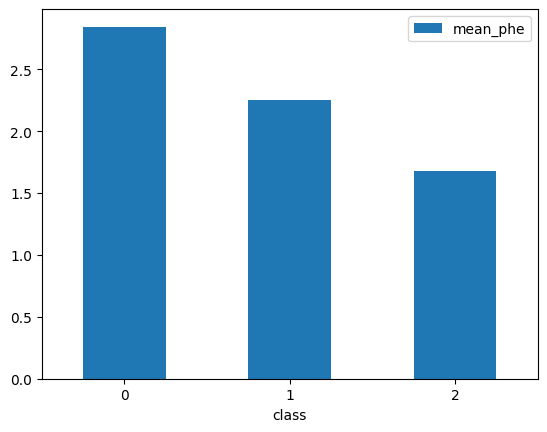

In [ ]:
# class별 평균 폴리페놀 비교
class_phe = wine.groupby('class').agg(mean_phe=('total_phenols', 'mean'))
class_phe.plot(kind='bar', y='mean_phe')
plt.xticks(rotation=0)
plt.show()

-> 폴리페놀 역시 와인의 풍미와 향, 즉 바디감에 영향을 미치는 요소이다. 그래프를 보았을 때 class0이 가장 높은 수치를 나타내고 있다. 이는 즉 마그네슘 함량 비교에서 분석한 class0이 바디감을 기준으로 가장 높은 바디감을 가진 와인들로 이루어져있다는 예측을 더욱 확고히 해준다.

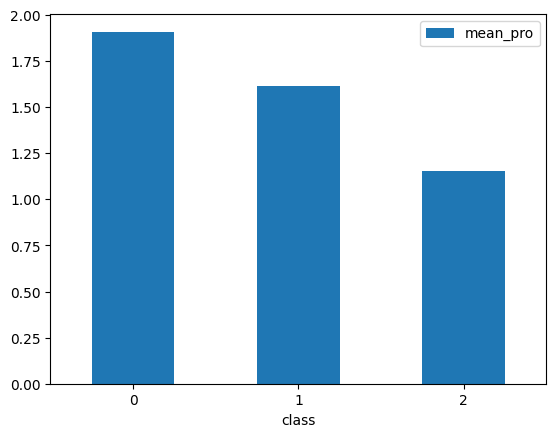

In [ ]:
# class별 평균 프로안토시아닌 비교
class_pro = wine.groupby('class').agg(mean_pro=('proanthocyanins', 'mean'))
class_pro.plot(kind='bar', y='mean_pro')
plt.xticks(rotation=0)
plt.show()

-> 프로안토시아닌은 와인에서 발견되는 폴리페놀화합물로, 색상과 탄맛에 영향을 주는데 중요한 역할을 한다. class0이 가장 높은 프로안토시아닌 함유량을 가진 것을 보아, 탄맛이 강한 와인들로 구성되어 있음을 알 수 있다. 이는 곧 class0이 가장 높은 바디감을 가졌다는 예측과 상통한다.

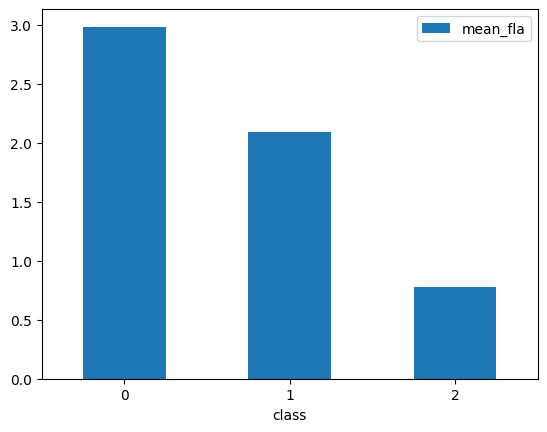

In [ ]:
# class별 평균 플라보노이드 비교
class_fla = wine.groupby('class').agg(mean_fla=('flavanoids', 'mean'))
class_fla.plot(kind='bar', y='mean_fla')
plt.xticks(rotation=0)
plt.show()

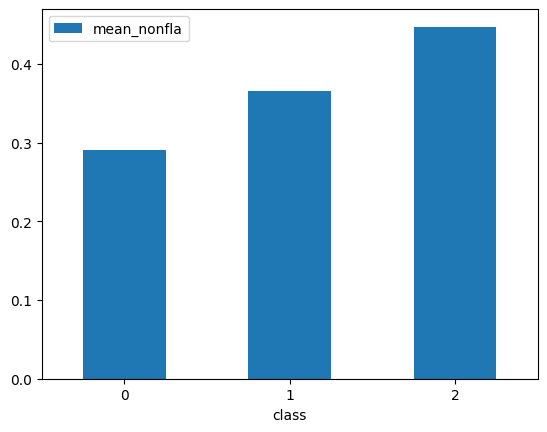

In [ ]:
# class별 평균 비플라보노이드 폴리페놀 비교
class_nonfla = wine.groupby('class').agg(mean_nonfla=('nonflavanoid_phenols', 'mean'))
class_nonfla.plot(kind='bar', y='mean_nonfla')
plt.xticks(rotation=0)
plt.show()

-> 한편, 폴리페놀의 구성을 더 자세히 보았을 때, 폴리페놀의 하위 그룹인 플라보노이드는 폴리페놀 비교 그래프와 매우 비슷한 양상을 보인다. 그러나 플라보노이드를 제외한 나머지 폴리페놀의 하위 그룹의 경우 정반대의 양상을 보이고 있다. 즉, 폴리페놀 측면에서 class0이 가장 함유량이 많은 것은 사실이나, 그 안에서 비플라보노이드 폴리페놀은 class2가 가장 많으며, class0은 오히려 가장 적음을 알 수 있다. 따라서 와인의 색이나 향 측면에서는 class0과 class2에 명백한 차이가 있을 것임을 예측할 수 있다.

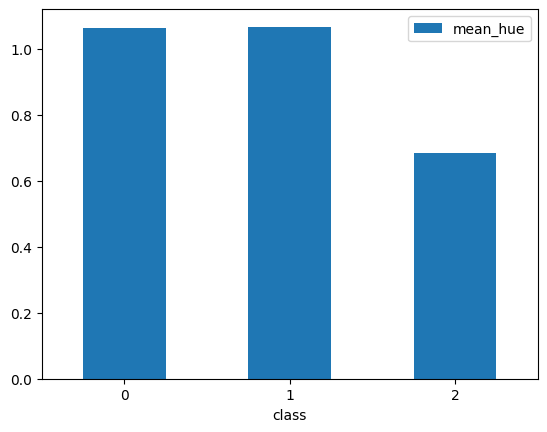

In [ ]:
# class별 평균 색조 비교
class_hue = wine.groupby('class').agg(mean_hue=('hue', 'mean'))
class_hue.plot(kind='bar', y='mean_hue')
plt.xticks(rotation=0)
plt.show()

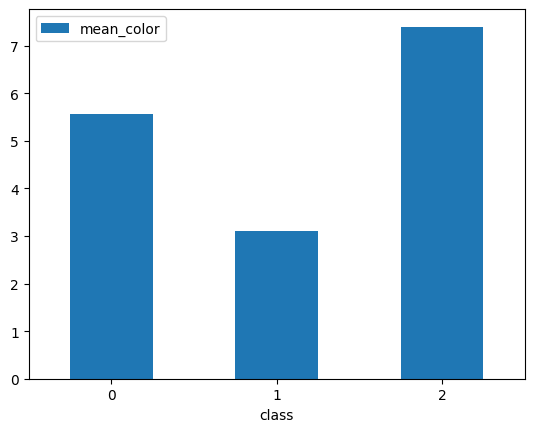

In [ ]:
# class별 평균 색상의 진한 정도 비교
class_color = wine.groupby('class').agg(mean_color=('color_intensity', 'mean'))
class_color.plot(kind='bar', y='mean_color')
plt.xticks(rotation=0)
plt.show()

-> hue와 color_intensity 칼럼을 통해 위의 class0과 class2의 색상 차이에 대한 가설을 검증할 수 있다. 평균 색조의 경우 class0과 class1은 매우 유사한 반면, class2는 명확한 차이를 보인다. 색상의 진한 정도를 비교한 그래프를 보았을 때, class2는 상대적으로 색상이 진한 와인들이 속해있으며, class0은 그보다 더 연한 색상의 와인, 그리고 class1은 가장 옅은 색상의 와인으로 구성되었음을 확인할 수 있다.

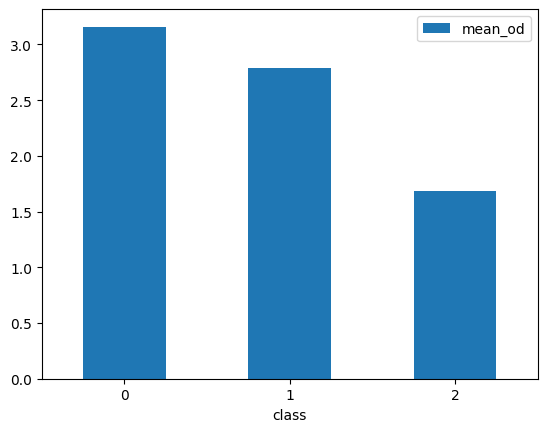

In [ ]:
# class별 평균 흡광도 비교
class_od = wine.groupby('class').agg(mean_od=('od280/od315_of_diluted_wines', 'mean'))
class_od.plot(kind='bar', y='mean_od')
plt.xticks(rotation=0)
plt.show()

-> 이 비율은 와인의 색상 및 중성화된 형태에서의 화학적 특성과 관련이 있다. 색상 측면에서 보았을 때, 마찬가지로 class0과 class2가 큰 차이를 보임을 알 수 있다.

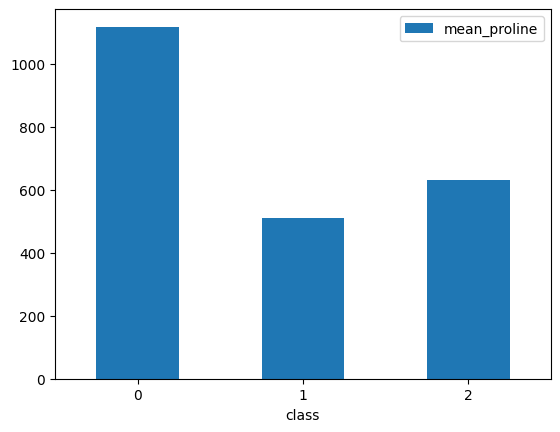

In [ ]:
# class별 평균 프롤린 비교
class_proline = wine.groupby('class').agg(mean_proline=('proline', 'mean'))
class_proline.plot(kind='bar', y='mean_proline')
plt.xticks(rotation=0)
plt.show()

-> 프롤린 함유량은 와인의 전반적인 산미, 타닌감, 그리고 바디감에 영향을 미치는 요소로, class0이 압도적으로 높은 함유량을 가짐을 알 수 있다. 즉, 앞서 바디감이 가장 높은 것으로 예측된 class0에 대한 설명이 타당하다고 판단된다.

==> 전반적으로 세 class 모두 도수 측면에서는 큰 차이가 없으나, 바디감 측면에서는 class0이 가장 압도적이며, 산미와 색조 측면에서는 class2가 산미가 높고 짙은 색상의 와인들로 예측된다. class1의 경우 색상이 가장 옅은 와인들로 예측된다.

==> 따라서 와인들을 세 가지 class로 구분한다면 바디감이 높은 와인들은 class0, 산미가 높고 색상이 진한 와인들은 class2, 그리고 색상이 옅은 와인들은 class1로 구분된다고 볼 수 있다.

<Axes: >

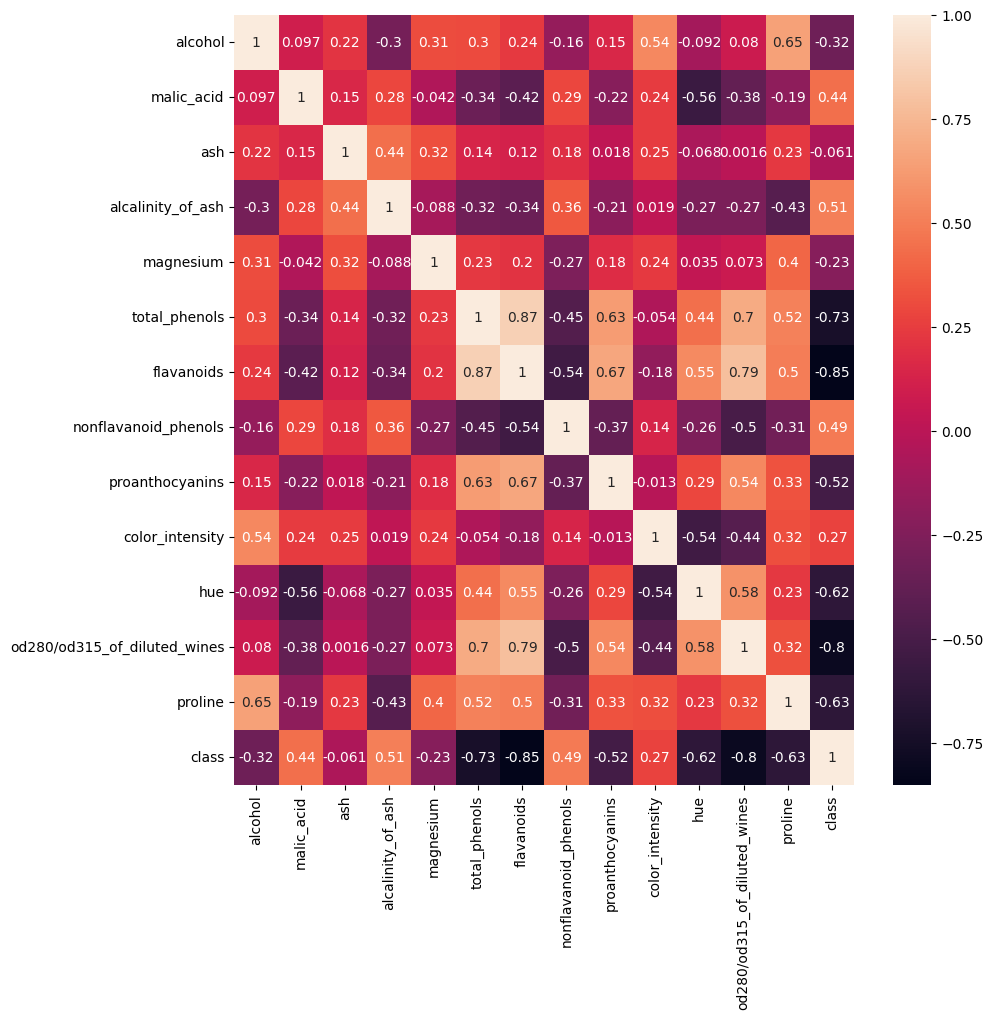

In [ ]:
# 각 칼럼들의 상관계수 확인
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True)

-> 각 칼럼들의 상관계수를 파악함으로써 위의 예측이 어느정도 타당성이 있는지 확인할 수 있다.